O. Pannekoucke$^{1,2,3}$

$^1$ INPT-ENM, Toulouse, France

$^2$ CNRM, Université de Toulouse, Météo-France, CNRS, Toulouse, France

$^3$ CERFACS, Toulouse, France

(olivier.pannekoucke@meteo.fr)

**Abstract**

This notebook illustrates the use of sympkf to build and handle the PKF dynamics associated with the transport of two chemical species over a 1D domain, and in the case of a periodic chemical reaction. Hence, the dynamics reads as 
$$\left\{\begin{array}{c}
\partial_t A +u\partial_x A =B\\
\partial_t B +u\partial_x B =-A
\end{array}\right.$$
where $A$ and $B$ are functions of $t,x$, and $u(x)$ is a stationnary wind.

Thanks to the splitting strategy, the PKF is first applied in 0D on the periodic reaction, than on the full dynamics.

# Definition of the 1D multivariate dynamics

In [1]:
import sympy
sympy.init_printing() 

In [2]:
import sympkf
sympkf.__version__

'1.0.6'

**Definition of the dynamics from sympy tools**

In [3]:
from sympy import Function, Derivative, Eq, symbols
from sympkf import SymbolicPKF

In [4]:
t, x = symbols('t x')
u = Function('u')(x)
A = Function('A')(t,x)
B = Function('B')(t,x)

# 0D periodic chemical reaction

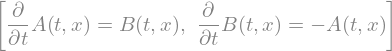

In [5]:
# definition of the dynamics
dynamics = [Eq(Derivative(A,t), B), Eq(Derivative(B,t),-A)]
dynamics

In [6]:
pkf_dynamics = SymbolicPKF(dynamics)

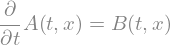

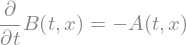

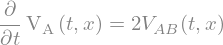

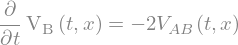

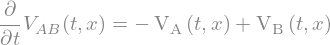

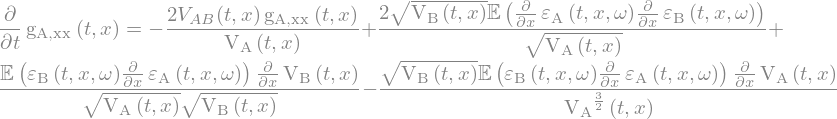

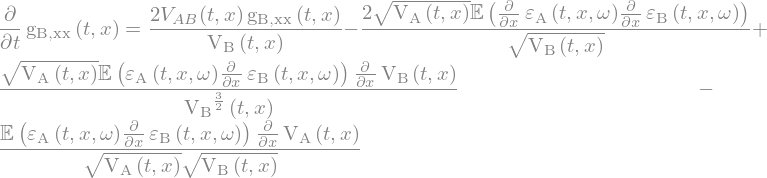

In [7]:
for equation in pkf_dynamics.in_metric:    
    #display(equation.subs(pkf_dynamics.internal_closure)) 
    display(equation)

# 1D transport of a periodic chemical reaction

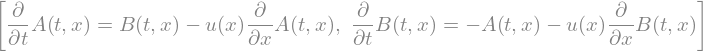

In [8]:
# Definition of the dynamics
dynamics = [Eq(Derivative(A,t),-u*Derivative(A,x)+ B), Eq(Derivative(B,t), -u*Derivative(B,x)-A)]
dynamics

In [9]:
pkf_dynamics = SymbolicPKF(dynamics)

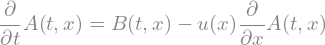

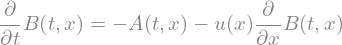

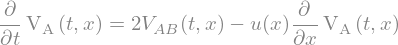

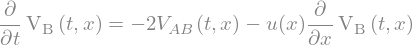

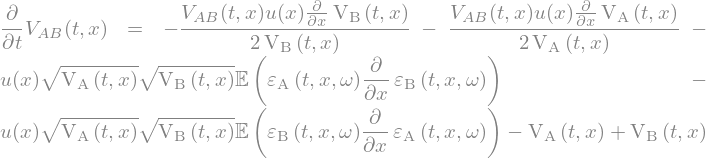

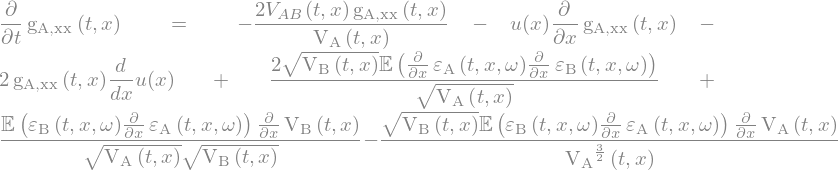

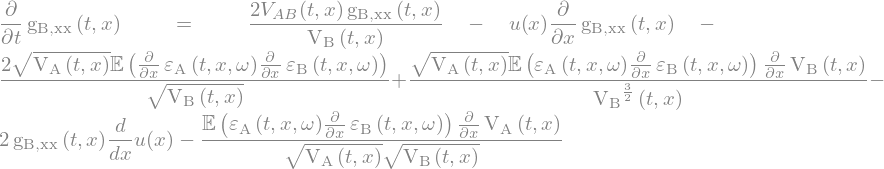

In [10]:
for equation in pkf_dynamics.in_metric:    
    #display(equation.subs(pkf_dynamics.internal_closure)) 
    display(equation)

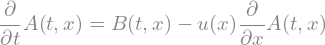

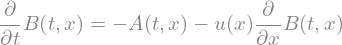

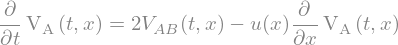

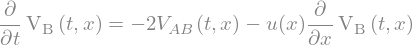

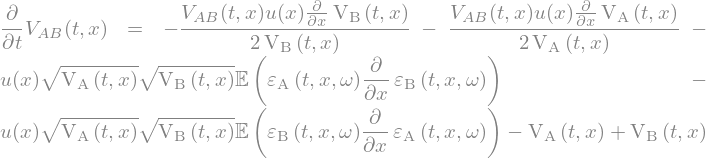

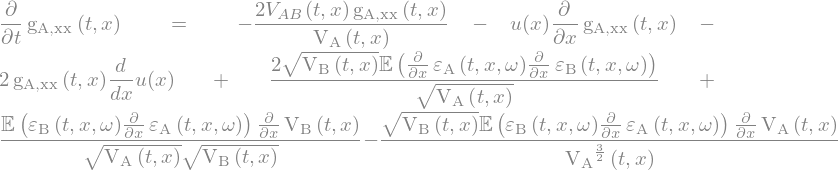

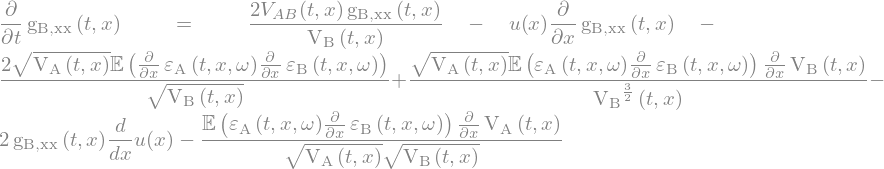

In [11]:
for equation in pkf_dynamics.in_metric:    
    display(equation.subs(pkf_dynamics.internal_closure))     

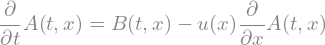

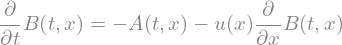

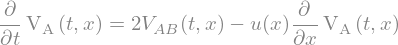

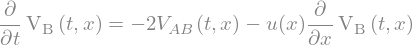

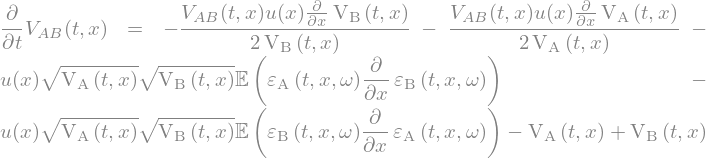

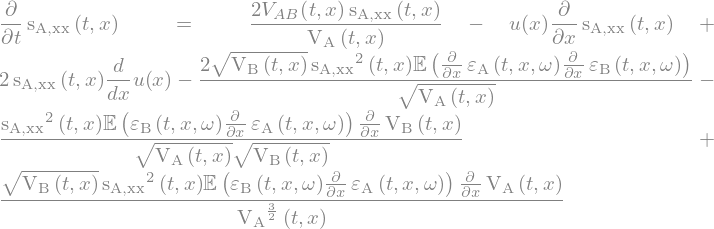

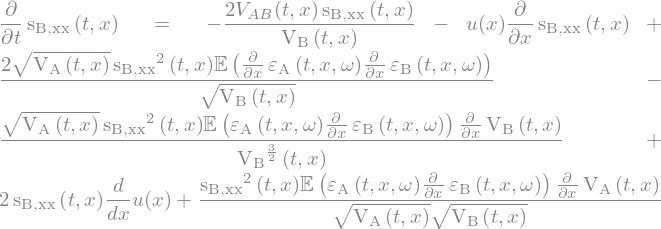

In [12]:
for equation in pkf_dynamics.in_aspect:    display(equation)